In [1]:
import pandas as pd
import numpy as np
import sklearn 
from xgboost import XGBClassifier #algorithm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

C:\Users\Abdul Ghaffar\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
#loading the dataset
dataset = pd.read_csv('NewAudioDataSet.csv')

In [3]:
#Getting the list of features and the label
features = dataset.loc[:,dataset.columns!='Parkinson'].values
label = dataset.loc[:,'Parkinson'].values

In [4]:
#scaling the features
scale = MinMaxScaler((-1,1))
x_data = scale.fit_transform(features)
y_data = label

In [5]:
#spliting the dataset as 20% for testing and rest for training
x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)

In [6]:
#Training the model
model = XGBClassifier(max_depth=12,
                        subsample=0.33,
                        objective='binary:logistic',
                        n_estimators=300,
                        learning_rate = 0.01)
eval_set = [(x_train, y_train), (x_test, y_test)]
model.fit(x_train, y_train)

C:\Users\Abdul Ghaffar\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=12, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.33,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [7]:
#Predicting from testing data
test_prediction = model.predict(x_test)
print(test_prediction)

[0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0.

In [8]:
#Calculating the accuracy from testing data
test_accuracy = accuracy_score(y_test, test_prediction)*100
print(test_accuracy)

98.01488833746899


In [9]:
#Predicting from training data
train_prediction = model.predict(x_train)
print(train_prediction)

[0. 1. 0. ... 0. 1. 1.]


In [10]:
#Calculating the accuracy from training data
train_accuracy = accuracy_score(y_train, train_prediction)*100
print(train_accuracy)

99.87585350713843


In [11]:
# confusion matrix
cm = confusion_matrix(y_test, test_prediction)

In [12]:
# classification report which consists of performance rate
classificationReport = classification_report(y_test, test_prediction)
print(classificationReport)

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       196
         1.0       0.99      0.98      0.98       207

    accuracy                           0.98       403
   macro avg       0.98      0.98      0.98       403
weighted avg       0.98      0.98      0.98       403



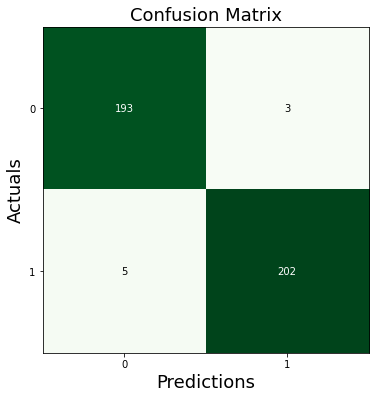

In [13]:
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [14]:
# Saving the model
import pickle

model_Filename = "VoiceModel.pkl"  

with open(model_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [15]:
# # Loading the Model 
# with open("VoiceModel.pkl", 'rb') as file:  
#     model = pickle.load(file)